# Portfolio Construction and Analysis -- Execution using IBKR API
## Objectives
1. Select some assets based on their historical performances as portfolio.
2. Execute the trades using IBKR API

In [57]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import sys
sys.path.insert(0, r'C:\Users\user\Documents\GitHub\Portfolio-Construction-and-Analysis\python_files')
import functions_1 as fnc
from ib_insync import *
util.startLoop()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Assets
First I will select the assets I want in my portfolio, this will be done manually although there can be advanced methods of doing this but right now I don't know how to do it and it's not my goal too, so I will first select a bunchg of ETFs from Yahoo Finance and then check their previous performances and run a backtest too, then I will execute the suitable portfolio weights in a simulated IBKR account which currently has $1000000 balance in it. I will rebalnce this portfolio on quarterly basis. This is the first portfolio I am running a forward test in but as I learn more and gather more knowlege and ideas I will do some much more advanced type of long term portfolio executions.

So far I have developed all the tools I need in order to analyze a portfolio but now comes the main part which is deciding and then actually executing my ideas.

In [58]:
tickers = ['VGTSX', 'VIMSX', 'VIVAX', 'VISVX', 'NAESX', 'VWO', 'SPY', 'GLD', 'USRT', 'IAU', 'VGLT', 'VONG', 'IXUS', 'VCSH', 'VTIP',
            'VCIT', 'TLT', 'BNDX', 'QQQ', 'BND', 'VXUS']
r_d_all = fnc.get_returns_data(tickers=tickers, replace_tickers=None, interval='1d', dividends=True)

In [59]:
r_d_all.index = pd.to_datetime(r_d_all.index.date)

In [60]:
r_d_all

,VGTSX,VIMSX,VIVAX,VISVX,NAESX,VWO,SPY,GLD,USRT,IAU,...,VONG,IXUS,VCSH,VTIP,VCIT,TLT,BNDX,QQQ,BND,VXUS
1980-01-03,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-09,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-12,0.002103,-0.001827,0.000129,-0.002529,-0.002395,0.003168,0.000579,0.009794,0.004544,0.009904,...,0.000837,0.002942,0.001746,0.002379,0.001957,-0.001109,0.000000,0.000490,0.001313,0.002596
2024-01-16,-0.010142,-0.006056,-0.004899,-0.008192,-0.007288,-0.013964,-0.003070,-0.009488,-0.003912,-0.009290,...,-0.001194,-0.014298,-0.002034,-0.001865,-0.004964,-0.009937,-0.003833,-0.000093,-0.004547,-0.013462
2024-01-17,-0.008126,-0.007084,-0.004794,-0.007080,-0.006824,-0.008935,-0.004645,-0.011016,-0.012764,-0.011461,...,-0.004424,-0.008802,-0.001650,-0.001359,-0.001963,-0.000886,-0.002244,-0.005383,-0.001493,-0.008135
2024-01-18,0.004631,0.004566,0.002213,0.005942,0.006262,0.003912,0.007424,0.008233,-0.004973,0.008432,...,0.012491,0.006504,0.000292,0.000850,-0.000492,-0.005200,-0.000321,0.013541,-0.000880,0.005556


In [61]:
r_d_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11105 entries, 1980-01-03 to 2024-01-19
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VGTSX   6978 non-null   float64
 1   VIMSX   6457 non-null   float64
 2   VIVAX   7860 non-null   float64
 3   VISVX   6457 non-null   float64
 4   NAESX   11105 non-null  float64
 5   VWO     4747 non-null   float64
 6   SPY     7798 non-null   float64
 7   GLD     4823 non-null   float64
 8   USRT    4206 non-null   float64
 9   IAU     4775 non-null   float64
 10  VGLT    3534 non-null   float64
 11  VONG    3353 non-null   float64
 12  IXUS    2825 non-null   float64
 13  VCSH    3561 non-null   float64
 14  VTIP    2831 non-null   float64
 15  VCIT    3561 non-null   float64
 16  TLT     5405 non-null   float64
 17  BNDX    2675 non-null   float64
 18  QQQ     6256 non-null   float64
 19  BND     4224 non-null   float64
 20  VXUS    3264 non-null   float64
dtypes: float64(21)
mem

In [62]:
start_dates = fnc.start_dates(r_d_all)
start_dates

{'NAESX': Timestamp('1980-01-03 00:00:00'),
 'VIVAX': Timestamp('1992-11-02 00:00:00'),
 'SPY': Timestamp('1993-02-01 00:00:00'),
 'VGTSX': Timestamp('1996-04-30 00:00:00'),
 'VIMSX': Timestamp('1998-05-22 00:00:00'),
 'VISVX': Timestamp('1998-05-22 00:00:00'),
 'QQQ': Timestamp('1999-03-11 00:00:00'),
 'TLT': Timestamp('2002-07-31 00:00:00'),
 'GLD': Timestamp('2004-11-19 00:00:00'),
 'IAU': Timestamp('2005-01-31 00:00:00'),
 'VWO': Timestamp('2005-03-11 00:00:00'),
 'BND': Timestamp('2007-04-11 00:00:00'),
 'USRT': Timestamp('2007-05-07 00:00:00'),
 'VCSH': Timestamp('2009-11-24 00:00:00'),
 'VCIT': Timestamp('2009-11-24 00:00:00'),
 'VGLT': Timestamp('2010-01-05 00:00:00'),
 'VONG': Timestamp('2010-09-23 00:00:00'),
 'VXUS': Timestamp('2011-01-31 00:00:00'),
 'VTIP': Timestamp('2012-10-17 00:00:00'),
 'IXUS': Timestamp('2012-10-25 00:00:00'),
 'BNDX': Timestamp('2013-06-05 00:00:00')}

As there are some assets which do not have enough data, I will filter the dataset by removing those assets so that I can at least have enough data to make some conclusions or do some reasonable backtests.

In [207]:
start_year = 2006
assets_before_start_year = [asset for asset, start_date in start_dates.items() if pd.to_datetime(start_date).year < start_year]
assets_before_start_year

['NAESX',
 'VIVAX',
 'SPY',
 'VGTSX',
 'VIMSX',
 'VISVX',
 'QQQ',
 'TLT',
 'GLD',
 'IAU',
 'VWO']

In [208]:
r_d = r_d_all[assets_before_start_year]
r_d

,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,GLD,IAU,VWO
1980-01-03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-09,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-12,-0.002395,0.000129,0.000579,0.002103,-0.001827,-0.002529,0.000490,-0.001109,0.009794,0.009904,0.003168
2024-01-16,-0.007288,-0.004899,-0.003070,-0.010142,-0.006056,-0.008192,-0.000093,-0.009937,-0.009488,-0.009290,-0.013964
2024-01-17,-0.006824,-0.004794,-0.004645,-0.008126,-0.007084,-0.007080,-0.005383,-0.000886,-0.011016,-0.011461,-0.008935
2024-01-18,0.006262,0.002213,0.007424,0.004631,0.004566,0.005942,0.013541,-0.005200,0.008233,0.008432,0.003912


In [209]:
r_d.dropna( inplace=True)
r_d

C:\Users\user\AppData\Local\Temp\ipykernel_11732\1894773899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_d.dropna( inplace=True)


,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,GLD,IAU,VWO
2005-03-11,0.000000,-0.003116,-0.005806,0.001238,-0.001833,0.000000,-0.009217,-0.005948,0.005204,0.006104,-0.001196
2005-03-14,0.004733,0.005558,0.005153,-0.004946,0.007346,0.006050,0.004519,0.004879,-0.009003,-0.009888,-0.005988
2005-03-15,-0.004397,-0.005527,-0.006836,-0.003107,-0.005469,-0.004677,-0.007937,-0.005130,0.000681,0.000454,-0.021687
2005-03-16,-0.005993,-0.006253,-0.007020,-0.000623,-0.009777,-0.006712,-0.011201,0.004972,0.005674,0.006579,-0.008621
2005-03-17,0.003491,0.002097,0.001663,-0.000624,0.003702,0.004730,0.002427,0.002657,-0.011058,-0.011269,0.008074
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-12,-0.002395,0.000129,0.000579,0.002103,-0.001827,-0.002529,0.000490,-0.001109,0.009794,0.009904,0.003168
2024-01-16,-0.007288,-0.004899,-0.003070,-0.010142,-0.006056,-0.008192,-0.000093,-0.009937,-0.009488,-0.009290,-0.013964
2024-01-17,-0.006824,-0.004794,-0.004645,-0.008126,-0.007084,-0.007080,-0.005383,-0.000886,-0.011016,-0.011461,-0.008935
2024-01-18,0.006262,0.002213,0.007424,0.004631,0.004566,0.005942,0.013541,-0.005200,0.008233,0.008432,0.003912


<Axes: title={'center': 'Annualized Returns'}>

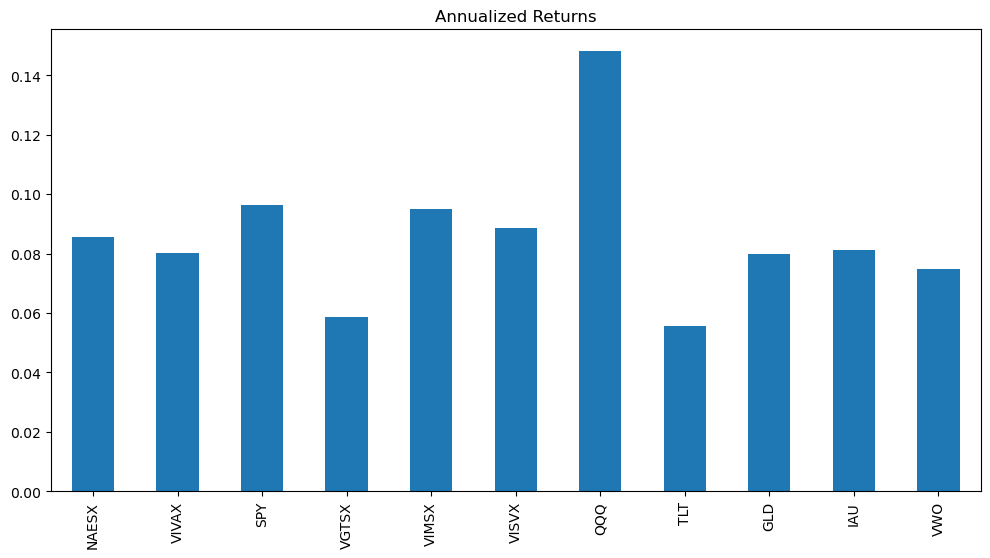

In [210]:
annu_r = fnc.annualize_returns(r_d, 252)
annu_r.plot.bar(title= 'Annualized Returns', figsize=(12, 6))

<Axes: title={'center': 'Annualized Volatility'}>

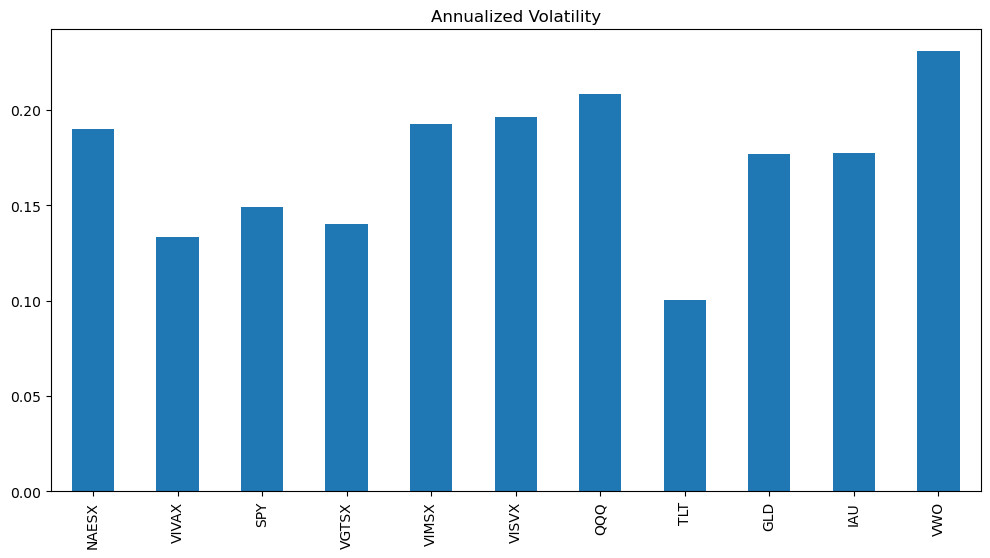

In [211]:
fnc.annualize_vol(r_d, 252).plot.bar(title= 'Annualized Volatility', figsize=(12, 6))

<Axes: title={'center': 'Sharpe Ratio of Individual Assets'}>

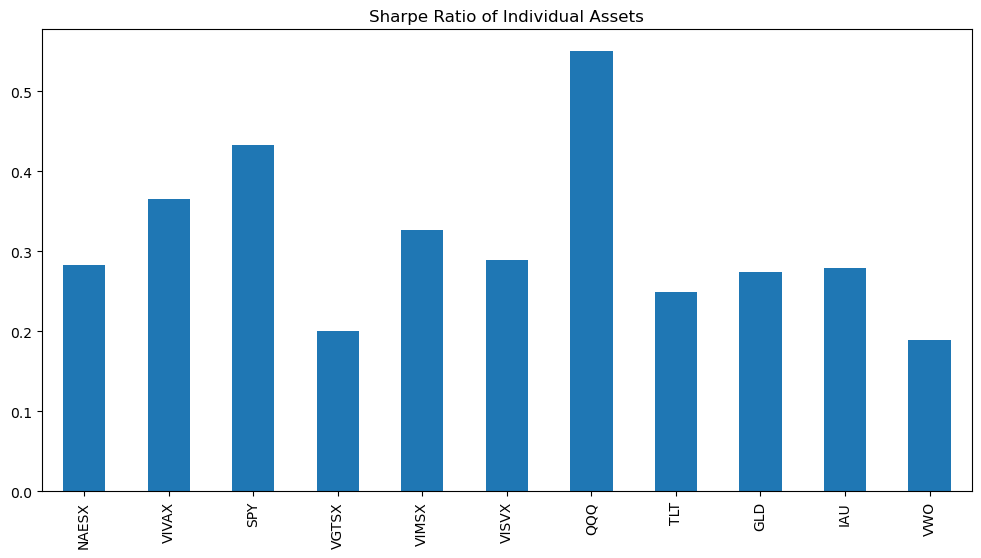

In [212]:
fnc.sharpe_ratio(r_d, 0.03, 252).plot.bar(figsize=(12,6), title='Sharpe Ratio of Individual Assets')

In [213]:
import seaborn as sns

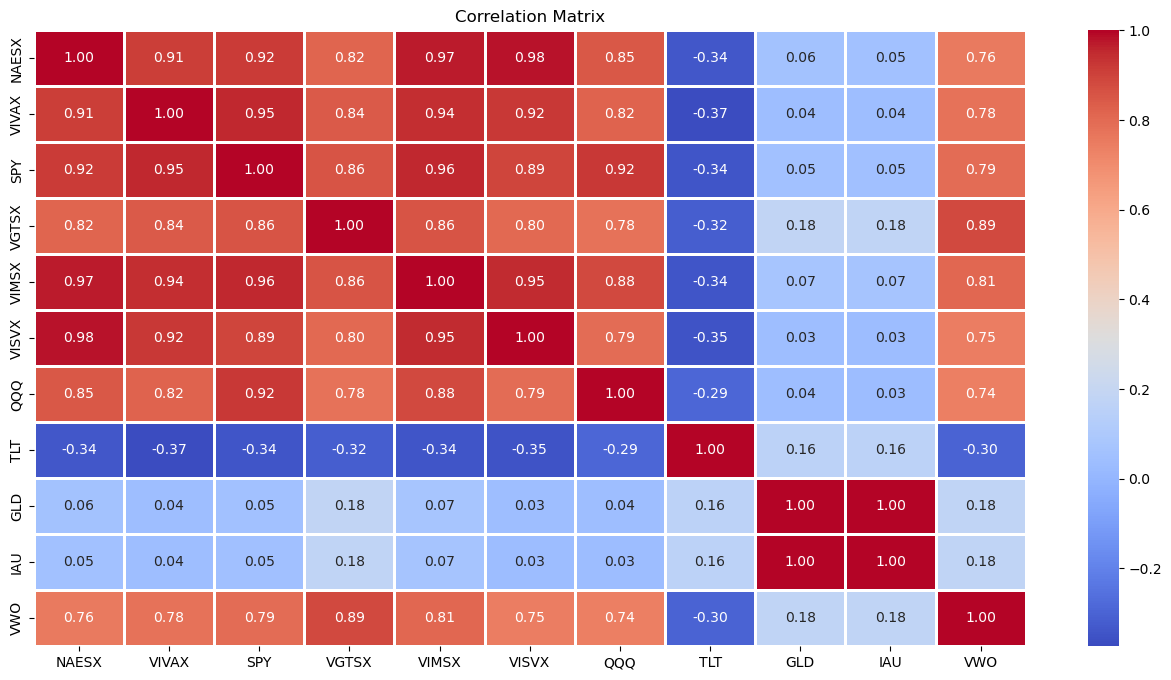

In [214]:
corr = r_d.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.9)
plt.title('Correlation Matrix')
plt.show()

In [215]:
r_d.corr().describe()

,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,GLD,IAU,VWO
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.634405,0.625061,0.641486,0.626275,0.651924,0.619366,0.596372,-0.121412,0.255335,0.253495,0.596638
std,0.472693,0.481486,0.477423,0.417832,0.476385,0.475350,0.444474,0.421442,0.371669,0.372620,0.398577
min,-0.337024,-0.373514,-0.341817,-0.319116,-0.343226,-0.348743,-0.291763,-0.373514,0.034469,0.031964,-0.300938
25%,0.406338,0.408508,0.423158,0.479154,0.440584,0.391093,0.387875,-0.342522,0.045414,0.042800,0.459092
50%,0.849297,0.844113,0.893724,0.817557,0.884641,0.804825,0.791971,-0.319116,0.074194,0.071701,0.756479
75%,0.943499,0.933576,0.937968,0.859210,0.952873,0.937144,0.866969,-0.065818,0.180150,0.177510,0.800570
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Portfolio Selection
Now that we have got assets that we want to buy let's analyze which portfolio weighting scheme will be most suitable for us.

<Axes: xlabel='Volatility'>

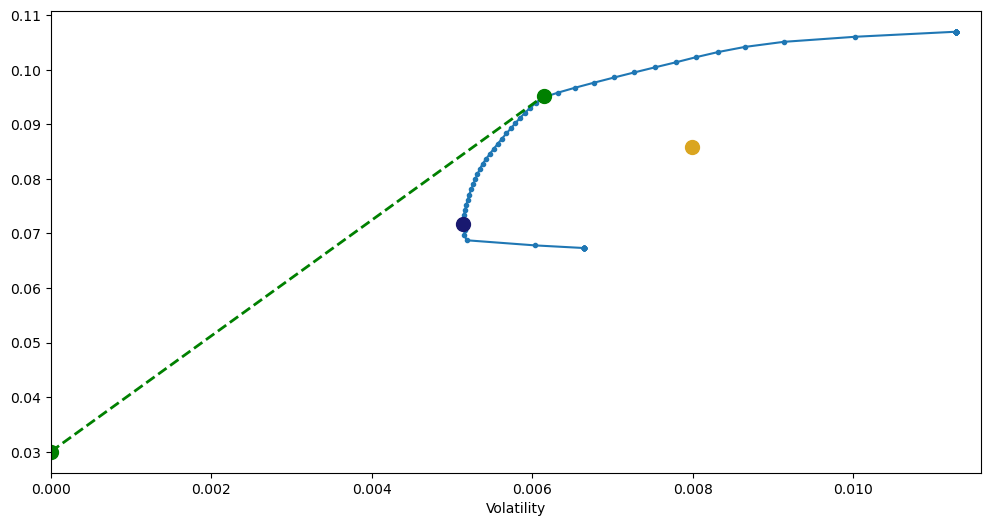

In [216]:
cov = r_d.cov()
fnc.plot_ef(100, annu_r, cov, show_gmv=True, show_ew= True, show_msr=True, riskfree_rate=0.03, max_asset_weight=0.25) #max allocation for each asset = 25%

## Backtests
Backtest and analyze the results of backtesting results of different types of portfolios

In [217]:
target_rets = [0.06, 0.08, 0.10, 0.12]
backtest = fnc.combined_backtesting_result(r_d.dropna(), portfolios=['GMV', 'MSR', 'EW', 'TR'], periods_per_year=252, starting_balance=1000, starting_step=1100,
                                            rolling_period=0, reweight_period=90, weights_column=True, max_asset_weight=0.20, riskfree_rate=0.03,
                                              target_returns=target_rets, weight_constraints = 1)

In [218]:
backtest

Global Minimum Variance                                \
                           Returns Account History      Drawdown   
2009-07-24            2.114309e-12          1000.0 -1.055774e-10   
2009-07-27            3.520295e-12          1000.0 -1.020572e-10   
2009-07-28           -5.044853e-12          1000.0 -1.071021e-10   
2009-07-29           -5.775047e-12          1000.0 -1.128772e-10   
2009-07-30            1.183942e-11          1000.0 -1.010378e-10   
...                            ...             ...           ...   
2024-01-12            3.659895e-03     5822.655412 -2.020587e-02   
2024-01-16           -1.134160e-02     5756.617197 -3.131830e-02   
2024-01-17           -1.019522e-02       5697.9272 -4.119423e-02   
2024-01-18            7.275080e-03     5739.380077 -3.421884e-02   
2024-01-19            8.597327e-03     5788.723406 -2.591570e-02   

                                                                             \
           Previous Peak                                            Weights   
2009-07-24   1000.000001  {'NAESX': 1e-10, 'VIVAX': 1e-10, 'SPY': 1e-10,...   
2009-07-27   1000.000001  {'NAESX': 1e-10, 'VIVAX': 1e-10, 'SPY': 1e-10,...   
2009-07-28   1000.000001  {'NAESX': 1e-10, 'VIVAX': 1e-10, 'SPY': 1e-10,...   
2009-07-29   1000.000001  {'NAESX': 1e-10, 'VIVAX': 1e-10, 'SPY': 1e-10,...   
2009-07-30   1000.000001  {'NAESX': 1e-10, 'VIVAX': 1e-10, 'SPY': 1e-10,...   
...                  ...                                                ...   
2024-01-12   5942.733504  {'NAESX': 0.19999999999498302, 'VIVAX': 0.1999...   
2024-01-16   5942.733504  {'NAESX': 0.19999999999498302, 'VIVAX': 0.1999...   
2024-01-17   5942.733504  {'NAESX': 0.19999999999498302, 'VIVAX': 0.1999...   
2024-01-18   5942.733504  {'NAESX': 0.19999999999498302, 'VIVAX': 0.1999...   
2024-01-19   5942.733504  {'NAESX': 0.19999999999498302, 'VIVAX': 0.1999...   

           Maximum Sharpe Ratio                                              \
                        Returns Account History      Drawdown Previous Peak   
2009-07-24         2.114309e-12          1000.0 -1.055774e-10   1000.000001   
2009-07-27         3.520295e-12          1000.0 -1.020572e-10   1000.000001   
2009-07-28        -5.044853e-12          1000.0 -1.071021e-10   1000.000001   
2009-07-29        -5.775047e-12          1000.0 -1.128772e-10   1000.000001   
2009-07-30         1.183942e-11          1000.0 -1.010378e-10   1000.000001   
...                         ...             ...           ...           ...   
2024-01-12         3.362961e-03     6493.831427 -1.718497e-02   6607.379016   
2024-01-16        -9.396079e-03     6432.814877 -2.641957e-02   6607.379016   
2024-01-17        -9.767134e-03     6369.984712 -3.592866e-02   6607.379016   
2024-01-18         8.429205e-03     6423.678618 -2.780231e-02   6607.379016   
2024-01-19         1.091251e-02     6493.777069 -1.719319e-02   6607.379016   

                                                               ...  \
                                                      Weights  ...   
2009-07-24  {'NAESX': 1e-10, 'VIVAX': 1e-10, 'SPY': 1e-10,...  ...   
2009-07-27  {'NAESX': 1e-10, 'VIVAX': 1e-10, 'SPY': 1e-10,...  ...   
2009-07-28  {'NAESX': 1e-10, 'VIVAX': 1e-10, 'SPY': 1e-10,...  ...   
2009-07-29  {'NAESX': 1e-10, 'VIVAX': 1e-10, 'SPY': 1e-10,...  ...   
2009-07-30  {'NAESX': 1e-10, 'VIVAX': 1e-10, 'SPY': 1e-10,...  ...   
...                                                       ...  ...   
2024-01-12  {'NAESX': 1.7094377499345822e-13, 'VIVAX': 0.1...  ...   
2024-01-16  {'NAESX': 1.7094377499345822e-13, 'VIVAX': 0.1...  ...   
2024-01-17  {'NAESX': 1.7094377499345822e-13, 'VIVAX': 0.1...  ...   
2024-01-18  {'NAESX': 1.7094377499345822e-13, 'VIVAX': 0.1...  ...   
2024-01-19  {'NAESX': 1.7094377499345822e-13, 'VIVAX': 0.1...  ...   

           Target Returns 10.0%                                              \
                        Returns Account History      Drawdown Previous Peak   
2

In [219]:
rets = backtest.xs('Returns', level=1, axis=1)
hist = backtest.xs('Account History', level=1, axis=1)
weights = backtest.xs('Weights', level=1, axis=1)
drawdown = backtest.xs('Drawdown', level=1, axis=1)
prev_peak = backtest.xs('Previous Peak', level=1, axis=1)

In [220]:
# Add S&P500 returns to returns dataframe in order to compare
sp500 = fnc.get_returns_data(tickers=['^GSPC'], start = rets.index[0], end = rets.index[-1], interval='1d')
sp500.index = sp500.index.date
rets['S&P500'] = sp500

C:\Users\user\AppData\Local\Temp\ipykernel_11732\2219055362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rets['S&P500'] = sp500


In [221]:
fnc.summary_stats(rets, periods_per_year=252, riskfree_rate= 0.03)

,Annualized Returns,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic Cvar (5%),Sharpe Ratio,Max Drawdown,Time Period
Global Minimum Variance,0.128997,0.136485,-0.506469,11.931661,0.013268,0.020136,0.704283,-0.254345,-5292 days
Maximum Sharpe Ratio,0.137999,0.146063,-0.478622,12.064450,0.014106,0.021662,0.717942,-0.267146,-5292 days
Equally Weighted,0.094787,0.108430,-0.569916,12.280458,0.010636,0.016031,0.580162,-0.215259,-5292 days
Target Returns 6.0%,0.138847,0.136304,-0.263821,14.147840,0.012270,0.020463,0.775393,-0.220863,-5292 days
Target Returns 8.0%,0.152529,0.133210,-0.252410,11.303229,0.012388,0.019553,0.893130,-0.194455,-5292 days
Target Returns 10.0%,0.146538,0.140824,-0.438386,11.216405,0.013610,0.020659,0.803529,-0.247194,-5292 days
Target Returns 12.0%,0.106820,0.159020,-0.956882,16.711046,0.015802,0.023885,0.469058,-0.328185,-5292 days
S&P500,0.115788,0.174491,-0.483734,14.995846,0.016384,NaN,0.477477,-0.339250,-5289 days


<Axes: title={'center': 'Performance of different Portfolio schemes'}>

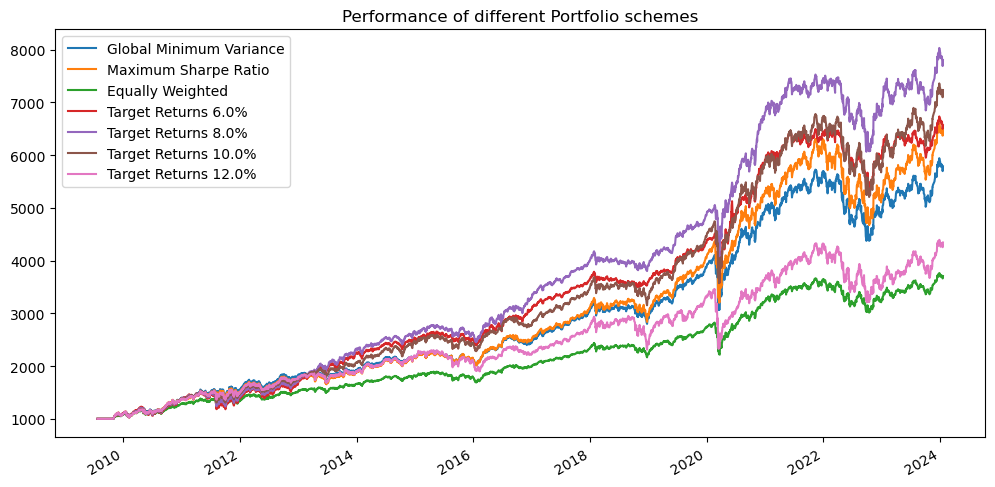

In [222]:
hist.plot(figsize=(12, 6), title= 'Performance of different Portfolio schemes')

In [223]:
weights_change = fnc.weights_change(weights)

In [224]:
weights_change['Target Returns 8.0%'].mean().round(6)

NAESX    0.135758
VIVAX    0.196162
SPY      0.144230
VGTSX    0.196097
VIMSX    0.044681
VISVX    0.090443
QQQ      0.036573
TLT      0.168499
GLD      0.123447
IAU      0.110765
VWO      0.079285
dtype: float64

In [225]:
weights_change['Global Minimum Variance'].mean().round(6)

NAESX    0.181016
VIVAX    0.196161
SPY      0.196161
VGTSX    0.196161
VIMSX    0.000000
VISVX    0.006547
QQQ      0.106678
TLT      0.196161
GLD      0.196161
IAU      0.196161
VWO      0.000000
dtype: float64